## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

**TASK (1)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# get the N of rows in dataset
out = ! wc -l ~/data/data_000637.txt
N = int(out[0].split(" ")[0])
print(N)
# we will just read them all
df = pd.read_csv('~/data/data_000637.txt',nrows=N)

# sorting by time measure
df = df.sort_values(["ORBIT_CNT","BX_COUNTER","TDC_MEAS"])

1310721


**TASK (2)**
Grouping the dataframe by different values of `BX_COUNTER`, we see how many times a single digit appears; since the distribution appears to be pretty uniform we can safely assume that the highest recorded digit is the maximum value `BX_COUNTER` can get before adding a unit to `ORBIT_CNT`.

In [2]:
#df.sort_values(["ORBIT_CNT","BX_COUNTER","TDC_MEAS"]).head(20)
print(df.groupby("BX_COUNTER").count())
print("ORBIT_CNT triggers when {} BX_COUNTER has been reached.".format(df["BX_COUNTER"].max()+1))

            HEAD  FPGA  TDC_CHANNEL  ORBIT_CNT  TDC_MEAS
BX_COUNTER                                              
0            354   354          354        354       354
1            355   355          355        355       355
2            345   345          345        345       345
3            340   340          340        340       340
4            363   363          363        363       363
...          ...   ...          ...        ...       ...
3559         329   329          329        329       329
3560         330   330          330        330       330
3561         385   385          385        385       385
3562         328   328          328        328       328
3563         351   351          351        351       351

[3564 rows x 5 columns]
ORBIT_CNT triggers when 3564 BX_COUNTER has been reached.


**TASK (3) + (4)**
Let's do task 4 first and use it to calculate total recording time. We create a new column `ns` to calculate absolute time and then a simple `max`-`min` revelas how long the data taking lasted.

In [3]:
df["ns"] = df["ORBIT_CNT"]*3564*25 + df["BX_COUNTER"]*25 + df["TDC_MEAS"]*25/30
total_time_ns = df["ns"].max() - df["ns"].min()
print("Data taking lasted for {:.5} milliseconds.".format(total_time_ns*1e-6))



Data taking lasted for 980.42 milliseconds.


**TASK (5)**

In [4]:
df["HEAD"]=np.random.randint(2,size=df["HEAD"].shape)
df["HEAD"].describe() # we should see a mean and std equal to about 0.5

count    1.310720e+06
mean     4.999596e-01
std      5.000002e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: HEAD, dtype: float64

**TASK (6)**

In [5]:
df_half = df[df["HEAD"]==1]
df_half.head()

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS            ns
0     1     0          123  3869200167        2374        26  3.447457e+14
1     1     0          124  3869200167        2374        27  3.447457e+14
2     1     0           63  3869200167        2553        28  3.447457e+14
4     1     0           64  3869200167        2760        25  3.447457e+14
5     1     0           63  3869200167        2762         4  3.447457e+14

**TASK (7)**

FPGA
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

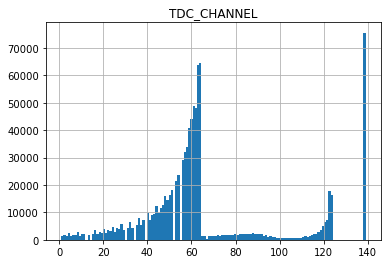

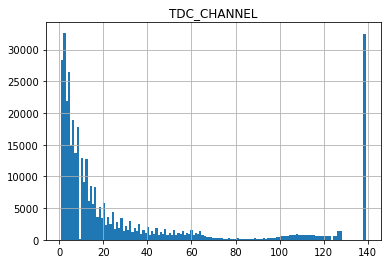

In [6]:
df.groupby("FPGA").hist("TDC_CHANNEL",bins=df["TDC_CHANNEL"].max())

**TASK (8)**

In [7]:
tdc_count=df.groupby(["FPGA","TDC_CHANNEL"]).size()
print("Top 3 noisy channels of FPGA #0: ")
print(tdc_count[0].sort_values(ascending=False)[:3])
print("Top 3 noisy channels of FPGA #1: ")
print(tdc_count[1].sort_values(ascending=False)[:3])

Top 3 noisy channels of FPGA #0: 
TDC_CHANNEL
139    75617
64     64581
63     63724
dtype: int64
Top 3 noisy channels of FPGA #1: 
TDC_CHANNEL
2      32669
139    32442
1      28438
dtype: int64


**TASK (9)**

In [8]:
print("There are {} distinct orbit values.".format(df.groupby(["ORBIT_CNT"]).ngroups))
print("Channel 139 counted {} distinct orbit values.".format(df[df["TDC_CHANNEL"]==139].groupby("ORBIT_CNT").ngroups))

There are 11001 distinct orbit values.
Channel 139 counted 10976 distinct orbit values.
